# 3-6. 프로젝트: 고양이 수염 스티커 만들기

# Step 1. 얼굴사진과 스티커 준비

고양이 사진 1개
cat-whiskers-removebg.png

사진 2개
dk.png /
smile.png

# Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [257]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

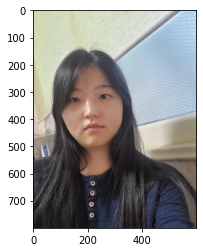

In [258]:
#이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/dk.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_bgr = cv2.resize(img_bgr,(600, 800))
img_show = img_bgr.copy() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#OpenCV는 BGR포멧을 사용하기 때문에, RGB 포멧으로 변환해야함
plt.imshow(img_rgb)
plt.show()

In [259]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

dlib을 이용하여, 이미지 내 얼굴 영역의 좌표를 출력하고, box 처리

- detector_hog: 이미지 피라미드에서 얼굴을 다시 검출하면, 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능 (두 번째 파라미터 = 이미지 피라미드의 수)

- dlib detector는 dlib.rectangles 타입의 객체를 반환

- dlib.rectangle 객체는 left(), top(), right(), bottom(), height(), width() 등의 함수를 포함

rectangles[[(92, 266) (315, 489)]]


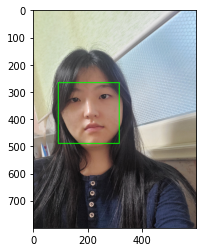

In [260]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 3. 스티커 적용 위치 확인하기

In [261]:
#랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [262]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


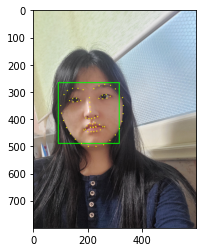

In [263]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 4. 스티커 적용하기

In [248]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(210, 373)
(x,y) : (210,373)
(w,h) : (224,224)


(224, 224, 3)


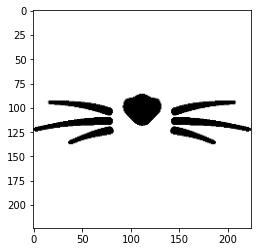

In [249]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [250]:
refined_x = x - w // 2 #box정중앙에위치
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (98,261)


In [251]:
# img_show[from:to] 형식
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
#img_sticker==255 ,검은색

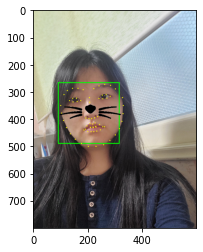

In [253]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

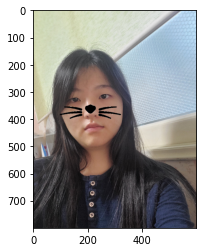

In [254]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

box와 landmark를 제거한 후, 최종 결과 출력

# step.5 다른 사진도 해보기

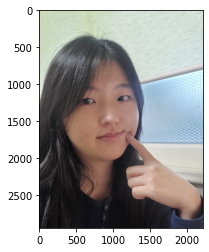

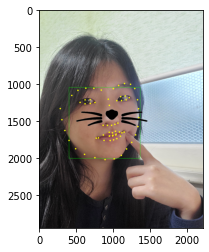

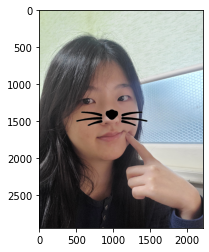

In [234]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/smile.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# 이미지 위에 얼굴의 box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark 모델 불러오기
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지를 읽어와서 resize
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2
refined_y = y - w // 2

# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 결과 이미지 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고
내 사진으로 해보는게 재밌었다.

dlib을 이용하여, box 처리 후 랜드마크 모델을 불러오면 손쉽게 얼굴을 인식할 수 있다.

이미지 스티커는 png파일을 불러온다면 배경을 제거할 수 있다. (img_sticker==255)부분에서 0=검은색, 255=흰색임을 유의해야한다.

이 점을 유의하면 다른 사진에도 쉽게 적용할 수 있을 것같다.